# Project 2: Least-Squares Classification

## Step 1: Download and load the MNIST datasets

Download the training and test datasets. Use the provided function to load the first 5000 images and labels of the training dataset

In [59]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

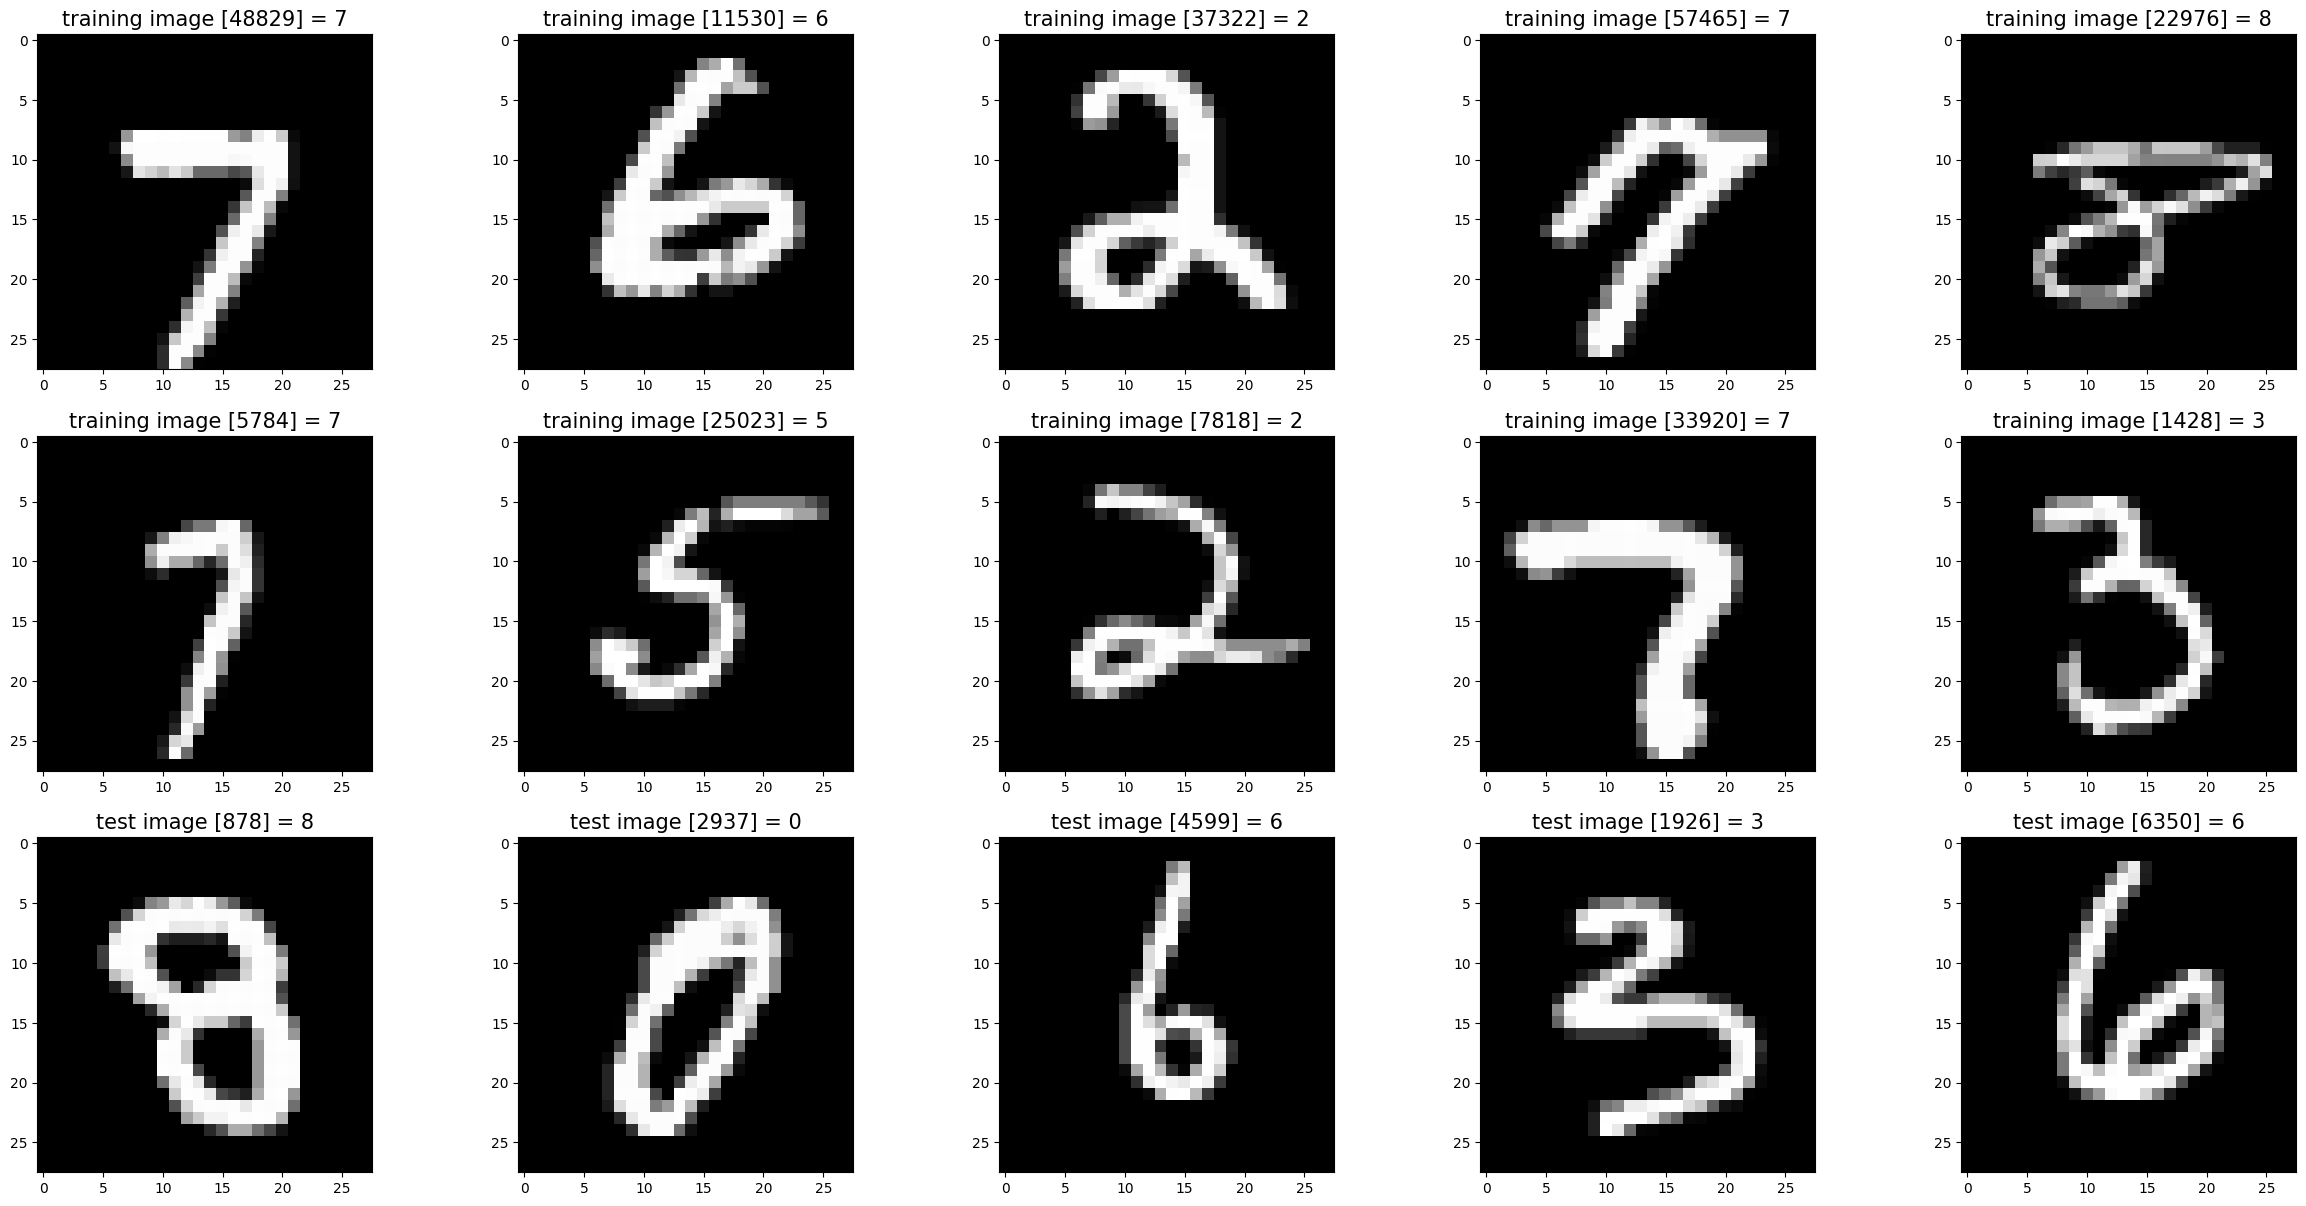

In [60]:
import random
import matplotlib.pyplot as plt
#from os.path import join


#
# Set file paths based on added MNIST Datasets
#
input_path = '/Users/andresreis/Desktop/ProjectTwoCode'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

# Load MINST dataset

# Implement your code to load: training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath
# mnist_dataloader = 
# (x_train, y_train), (x_test, y_test) = 
mnist_dataloader = MnistDataloader(
    training_images_filepath, training_labels_filepath,
    test_images_filepath, test_labels_filepath
)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


# Show some random training and test images 

images_to_show = []
titles_to_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_to_show.append(x_train[r])
    titles_to_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_to_show.append(x_test[r])        
    titles_to_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

## Step 2: Preprocess the data

Identify the row and column indices of the pixels that have nonzero intensities in at least 600 of the training images. These will be the features used for classification. 

In [61]:
import numpy as np

# Assuming x_train is a list of 28x28 images (each image is a list or array of shape (28, 28))
num_imgs = len(x_train)
pixel_dimensions = (28, 28)  # Assuming MNIST size (28x28 images)

# Initialize the nonzero count array
nonzero_count = np.zeros(pixel_dimensions, dtype=int)

# First loop: Count nonzero intensities for each pixel across all images
for img in x_train:
    for row in range(28):
        for col in range(28):
            if img[row][col] > 0:
                nonzero_count[row][col] += 1

# Second loop: Collect pixels with nonzero intensities in at least 600 images
pixels_to_consider = []
for row in range(28):
    for col in range(28):
        if nonzero_count[row][col] >= 600:
            pixels_to_consider.append((row, col))

# Convert list to array for consistency
pixels_to_consider = np.array(pixels_to_consider)

# Calculate the number of selected features
num_features = len(pixels_to_consider)

# Outputs
print(f"Number of features (selected pixels): {num_features}")

#debug
#print(img_array)
#plt.imshow(img_array, cmap='gray')
#plt.colorbar()
#plt.title('28x28 Image Matrix')
#plt.show()


Number of features (selected pixels): 493


## Step 3: Create the least-squares classifier

Construct the matrix $A$ and vector $y$ as 
$$minimize \ \|A\theta - y\|_2 $$
Solve the least-square problem to obtain the parameter vector $\theta$. Create a plot showing the values of the entries of $\theta$ at different pixel locations.

In [62]:
import numpy as np
from scipy.linalg import lstsq

def create_feature_matrix_and_labels(x_data, y_data, pixels_to_consider, num_imgs=None):
    num_sample = len(x_data)
    num_features = len(pixels_to_consider)

    A = np.zeros((num_sample, num_features))
    y = np.zeros((num_sample, 1))

    for i, img in enumerate(x_data):
        img_array = np.array(img)
        for j, (row, col) in enumerate(pixels_to_consider):
            A[i, j] = img_array[row, col]
        
        
        y[i] = 1 if y_data[i] == 0 else -1
    return A, y

A, y = create_feature_matrix_and_labels(x_train, y_train, pixels_to_consider)
theta, residuals, rank, s = lstsq(A, y)


/var/folders/f3/c6ygp94x2gd6sy6yg109y2br0000gn/T/ipykernel_6312/3836805488.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta_grid[row, col] = value


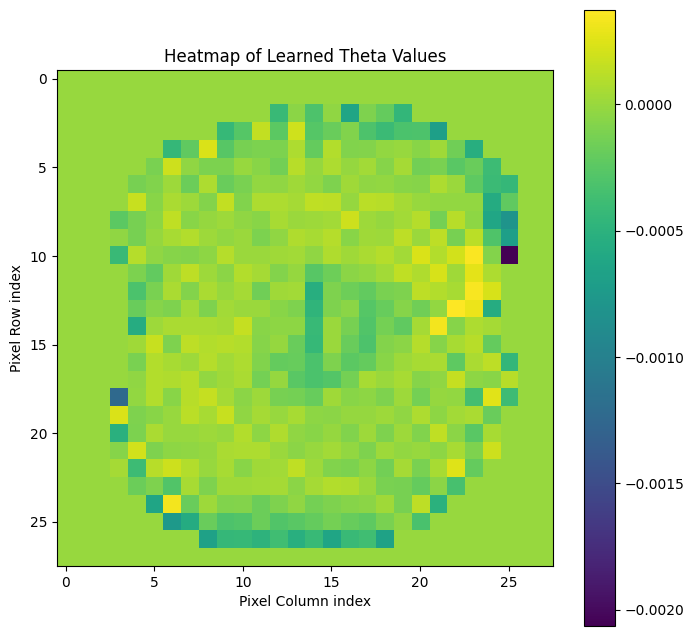

In [63]:
def plot_theta_heatmap(theta, pixels_to_consider):
    theta_grid = np.zeros((28, 28))

    for (row, col), value in zip(pixels_to_consider, theta):
        theta_grid[row, col] = value

    plt.figure(figsize=(8, 8))
    plt.imshow(theta_grid, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Heatmap of Learned Theta Values')
    plt.xlabel('Pixel Column index')
    plt.ylabel('Pixel Row index')
    plt.show()

plot_theta_heatmap(theta, pixels_to_consider)


## Step 4: Implement the least-squares classifier

Load the first 5000 images of the test dataset. Using these images, compute the error rate, false positive rate, and false negative rate of your classifier.

In [64]:
import numpy as np
from scipy.sparse.linalg import lsqr

# Step 1: Prepare training data
# Get the number of training images
num_train_images = len(x_train)

# Use create_feature_matrix_and_labels to build the feature matrix and labels for training data
A_train, y_train_vector = create_feature_matrix_and_labels(
    x_train, y_train, pixels_to_consider, num_imgs=num_train_images
)

# Step 2: Solve the least-squares problem to find the optimal theta
# Use lsqr to perform least-squares and find the best theta (parameters) for our model
# lsqr returns multiple outputs, and the solution vector theta is the first element
result = lsqr(A_train, y_train_vector)
theta = result[0]

# Step 3: Prepare test data
# Define the number of test images to use
num_test_images = 5000

# Build the feature matrix and labels for the test data using the first 5000 test images
A_test, y_test_subset = create_feature_matrix_and_labels(
    x_test, y_test, pixels_to_consider, num_imgs=num_test_images
)

# Step 4: Make predictions on the test data
# Predict by multiplying A_test (test features) with theta
y_pred = A_test @ theta

# Round the predictions to get integer labels (assuming binary or integer labels)
y_pred_rounded = np.round(y_pred).astype(int)

# Outputs
print("Predictions:", y_pred_rounded)


Predictions: [-1  0 -1 ... -2 -1 -1]


In [65]:
import numpy as np

def test_theta_performance(x_test, y_test, pixels_to_consider, theta, R=None):
    num_samples = len(x_test)
    num_errors = 0
    false_positives = 0
    false_negatives = 0

    num_positives = len(y_test) - np.count_nonzero(y_test)
    num_negatives = np.count_nonzero(y_test)

    print(f"num_positives: {num_positives}, num_negatives: {num_negatives}")

    for i, img in enumerate(x_test):
        img_array = np.array(img)
        if R is None:
            features = np.array([img_array[row, col] for row, col in pixels_to_consider])
        else:
            original_features = np.array([img_array[row, col] for row, col in pixels_to_consider])
            features = np.maximum(np.dot(R, original_features), 0)
             
        prediction = np.sign(np.dot(features, theta))
        true_label = 1 if y_test[i] == 0 else -1
        
        if prediction != true_label:
            num_errors += 1
            if prediction == 1 and true_label == -1:
                false_positives += 1
            elif prediction == -1 and true_label == 1:
                false_negatives += 1
    
    error_rate = num_errors / num_samples
    false_positive_rate = false_positives / num_negatives if num_negatives > 0 else 0
    false_negative_rate = false_negatives / num_positives if num_positives > 0 else 0
    
    return error_rate, false_positive_rate, false_negative_rate

error_rate, false_positive_rate, false_negative_rate = test_theta_performance(x_test, y_test, pixels_to_consider, theta)
print(f"Performance of theta:")
print(f"Error rate: {error_rate}")
print(f"False positive rate: {false_positive_rate}")
print(f"False negative rate: {false_negative_rate}")

num_positives: 980, num_negatives: 9020
Performance of theta:
Error rate: 0.0123
False positive rate: 0.0066518847006651885
False negative rate: 0.06428571428571428


## Step 5: Redo training with partial feature list

Repeat steps 1-4, except use only the first 100 images and labels of the training dataset to train the classifier. Use the same features that you identified in Step 2. How did the error rate and false positive/negative rates change?

In [66]:
# Implement your code here

x_100 = x_train[:100]
y_100 = y_train[:100]

A, y = create_feature_matrix_and_labels(x_100, y_100, pixels_to_consider)
theta_less_data, residuals, rank, s = lstsq(A, y)


error_rate, false_positive_rate, false_negative_rate = test_theta_performance(x_test, y_test, pixels_to_consider, theta_less_data)
print(f"Performance of theta_less_data:")
print(f"Error rate: {error_rate}")
print(f"False positive rate: {false_positive_rate}")
print(f"False negative rate: {false_negative_rate}")

num_positives: 980, num_negatives: 9020
Performance of theta_less_data:
Error rate: 0.0368
False positive rate: 0.018957871396895788
False negative rate: 0.2010204081632653


## Step 6: Feature Selection

In what follows, we will experiment with changing the feature set. Let $M_{0}$ denote the number of features that you identified in Step 2, and let $M = 5000$. Choose a matrix $R \in \mathbb{R}^{M \times M_{0}}$ whose entries are in $\{1, -1\}$ with equal probability. 
Letting $x_{i} \in \mathbb{R}^{M_{0}}$ denote the vector of features from Step 2 for the $i$-th image, the new feature vector is given by $\max{\{Rx_{i},0\}}$. Train a least-squares classifier using this new set of features.

In [67]:
import numpy as np
from scipy.sparse.linalg import lsqr

def LS_classifier_artificial_features(M, R, x_train, y_train, pixels_to_consider, num_imgs):
    # implement your code here
     sample = len(x_train)
     A = np.zeros((sample, M))
     y = np.zeros(sample)

     for i, img in enumerate(x_train):
        img_array = np.array(img)
        og_features = np.array([img_array[row, col] for row, col in pixels_to_consider])
        new_features = np.maximum(np.dot(R, og_features), 0)
        A[i, :] = new_features
        y[i] = 1 if y_train[i] == 0 else -1

     theta, _, _, _ = lstsq(A, y)
     
     return theta


In [68]:
# Implement your code to
# Set parameters
M = 5000
R = np.random.choice([1, -1], size=(M, len(pixels_to_consider)))
# Call the function to solve for theta
theta_arti_features = LS_classifier_artificial_features(M, R, x_train, y_train, pixels_to_consider, num_imgs)

# Output theta to verify
print(f"Solution theta shape: {theta.shape}")
print(f"First few theta values: {theta[:10]}")


Solution theta shape: (493,)
First few theta values: [-4.14746894e-04 -5.03351278e-05 -3.06811011e-04 -2.85817608e-05
 -6.31965687e-04 -9.54192177e-05 -2.02698456e-04 -4.49528896e-04
 -4.33277435e-04 -2.71839885e-04]


## Step 7: Evaluate the new classifier

Compute the error rate, false positive rate, and false negative rate for the new classifier that you constructed in the previous step. Repeat the process with $M=20, 50, 1000, 5000, 10000$. 

In [69]:
import numpy as np

# implement your code here to test the performance
error_rate_list = []
false_pos_rate_list = []
false_neg_rate_list = []

for M in [20, 50, 1000, 5000, 10000]:
    R = np.random.choice([1, -1], size=(M, len(pixels_to_consider)))
    theta_arti_features_M = LS_classifier_artificial_features(M, R, x_train, y_train, pixels_to_consider, num_imgs)
    error_rate, false_pos_rate, false_neg_rate = test_theta_performance(x_test, y_test, pixels_to_consider, theta_arti_features_M, R)
    error_rate_list.append(error_rate)
    false_pos_rate_list.append(false_pos_rate)
    false_neg_rate_list.append(false_neg_rate)    

print(f"Error rate list: {error_rate_list}")
print(f"False positive rate list: {false_pos_rate_list}")
print(f"False negative rate list: {false_neg_rate_list}")



num_positives: 980, num_negatives: 9020
num_positives: 980, num_negatives: 9020
num_positives: 980, num_negatives: 9020
num_positives: 980, num_negatives: 9020
num_positives: 980, num_negatives: 9020
Error rate list: [0.0629, 0.0314, 0.0065, 0.0021, 0.0025]
False positive rate list: [0.012527716186252771, 0.0076496674057649665, 0.0014412416851441242, 0.0006651884700665188, 0.0007760532150776053]
False negative rate list: [0.5265306122448979, 0.25, 0.053061224489795916, 0.015306122448979591, 0.018367346938775512]
